# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

# Loading Data


In [85]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import tweepy
import time
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


 <h3>1.&nbsp;<u>twitter-archive-enhanced.csv</u></h3><br>
 <b>Load twitter-archive-enhanced.csv file into a dataframe</b>

In [86]:
twitter_archive_enhanced_dataframe = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced_dataframe.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [87]:
twitter_archive_enhanced_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 <h3>2.&nbsp;<u>image_predictions.tsv</u></h3><br>
 <b>Use the Requests library to download the tweet image prediction (image_predictions.tsv)</b>

In [88]:
response= req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-prediction.tsv', mode='wb') as image_prediction_file:
    image_prediction_file.write(response.content)
image_predictions_dataframe=pd.read_csv('image-prediction.tsv', sep='\t')
image_predictions_dataframe.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [89]:
image_predictions_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h3>3.&nbsp;<u>tweet_json.json</u></h3><br>
<b>Programmatic assessing tweet.json.txt</b>

In [ ]:
consumer_key = '' #'<MY_CONSUMER_KEY>'
consumer_secret = '' #'<MY_CONSUMER_SECRET>'
access_token = '' #'<MY_ACCESS_TOKEN>'
access_token_secret = '' #'<MY_ACCESS_TOKEN_SECRET>'
auth = tweepy.OAuthHandler(consumer_key , consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler= auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)
missing_tweets = [] 
with open('tweet_json.json', 'a', encoding='utf8') as file:
    for tweet_id in twitter_archive_enhanced_dataframe['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended') #tweet_mode = "extended" to retrieve the full text
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets.append(tweet_id)

<b>Read tweet.json.txt into dataframe</b>

In [90]:
tweet_array=[]
with open('tweet-json.json') as tweet_json_file:
    for each_line in tweet_json_file:
        try:
            tweet_array.append(json.loads(each_line))
        except:
            continue
            
tweet_json_dataframe=pd.DataFrame(tweet_array, columns=list(tweet_array[0].keys()))    
tweet_json_dataframe.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_

In [91]:
tweet_json_trimmed_dataframe=tweet_json_dataframe[['id','retweet_count','favorite_count']]
tweet_json_trimmed_dataframe.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [92]:
tweet_json_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [93]:
twitter_archive_enhanced_dataframe.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [94]:
twitter_archive_enhanced_dataframe.duplicated().sum()

0

In [95]:
#twitter_archive_enhanced_dataframe.name

twitter_archive_enhanced_dataframe.groupby('name')['name'].count().head(6)

name
Abby     2
Ace      1
Acro     1
Adele    1
Aiden    1
Aja      1
Name: name, dtype: int64

In [96]:

twitter_archive_enhanced_dataframe[twitter_archive_enhanced_dataframe['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""n

In [97]:
#Number of retweets
len(twitter_archive_enhanced_dataframe[twitter_archive_enhanced_dataframe.retweeted_status_id.isnull()==False ]) 

181

In [98]:
image_predictions_dataframe.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [99]:
image_predictions_dataframe[['p1','p2','p3']].sort_values("p1").head(5)

,p1,p2,p3
1561,Afghan_hound,borzoi,doormat
1855,Afghan_hound,Saluki,bloodhound
1458,Afghan_hound,basset,Siberian_husky
1804,Afghan_hound,borzoi,doormat
446,African_crocodile,American_alligator,mink


In [100]:
image_predictions_dataframe.duplicated().sum()

0

In [101]:
image_predictions_dataframe.jpg_url.duplicated().sum()

66

In [102]:
tweet_json_dataframe.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [103]:
tweet_json_trimmed_dataframe.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [104]:
tweet_json_trimmed_dataframe.duplicated().sum()

0

<h3>Quality Issues Identified</h3>
<ol>
    <li><b>twitter_archive_enhanced</b>
   <ul>
      <li>Timestamp field is an object</li>
      <li>Tweet_id is an int64 type</li>
      <li>Presence of values such as <b>my&#44; an&#44; None&#44; quite&#44; space&#44; such&#44; the&#44; 
this  </b> in name	doggo	floofer	pupper	puppo columns </li>
     <li>Retweets are present and need to be deleted</li>
       <li><b>doggo&#44; floofer&#44; pupper&#44;puppo</b> columns can be merged into one</li>
    </ul>
         
    

  </li>
  <li><b>image_predictions.tsv</b>
    <ul>
     <li>Some duplicate values exit in jpg_url</li>
      <li>tweet_id is an int64 type</li>
    </ul>
  </li>
  <li><b>tweet_json</b>
   <ul>
     <li>id which is presumed to be tweet_id is an int64 type</li>
    </ul> 

   </li>
</ol>
<br>
<h3>Tidiness Issues Identified</h3>
<ol>
    <li>Convert date fields to timestamp

  </li>
  <li>Join the 3 dataset with tweet_id as join key

  </li>
  <li>Use a single column to show dog growth stage instead of 4 columns</li>
  <li>Remove the invalid numerators</li>
   <li>The source names are embedded in html anchor tags. I will extract the sources from within the tags</li>

</ol>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [105]:
twitter_archive_copy_enhanced_dataframe=twitter_archive_enhanced_dataframe.copy()
image_predictions_copy_dataframe=image_predictions_dataframe.copy()
tweet_json_copy_dataframe=tweet_json_dataframe.copy()
tweet_json_trimmed_copy_dataframe=tweet_json_trimmed_dataframe.copy()

### Issue #1: 

#### Define
Some supposed Date and Time fields are marked defined as Object datatypes. I will convert such fields to timestamp

#### Code

In [106]:
twitter_archive_copy_enhanced_dataframe.timestamp = pd.to_datetime(twitter_archive_copy_enhanced_dataframe.timestamp)

In [107]:
twitter_archive_copy_enhanced_dataframe['date'] = twitter_archive_copy_enhanced_dataframe['timestamp'].dt.date
twitter_archive_copy_enhanced_dataframe['time'] = twitter_archive_copy_enhanced_dataframe['timestamp'].dt.time

#### Test

In [108]:
type (twitter_archive_copy_enhanced_dataframe.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [109]:
type (twitter_archive_copy_enhanced_dataframe.date[0]), type (twitter_archive_copy_enhanced_dataframe.time[0])

(datetime.date, datetime.time)

### Issue #2: 

#### Define
tweet_id field is numeric. I will convert to string to make inner join easier in the later part of this exercise.
I will also rename id to tweet_id on tweet_json dataframe
<ol>
  <li>Rename 'id' column to 'tweet_id'</li>
     <li> Convert tweet_id to string datatype</li>
    </ol>

#### Code

In [110]:
twitter_archive_copy_enhanced_dataframe['tweet_id'] = twitter_archive_copy_enhanced_dataframe['tweet_id'].astype('str')
image_predictions_copy_dataframe['tweet_id'] =image_predictions_copy_dataframe['tweet_id'].astype('str')
tweet_json_copy_dataframe.rename(columns={"id": "tweet_id"},inplace=True)
tweet_json_copy_dataframe['tweet_id'] = tweet_json_copy_dataframe['tweet_id'].astype('str')
tweet_json_trimmed_copy_dataframe.rename(columns={"id": "tweet_id"},inplace=True)
tweet_json_trimmed_copy_dataframe['tweet_id'] = tweet_json_trimmed_copy_dataframe['tweet_id'].astype('str')

#### Test

In [111]:
type (twitter_archive_copy_enhanced_dataframe.tweet_id[0])

str

In [112]:
type (tweet_json_copy_dataframe.tweet_id[0])

str

In [113]:
tweet_json_copy_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
tweet_id                         2354 non-null object
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-nul

### Issue #3: 

#### Define
In image_predictions,duplicates exist in jpg_url. I will delete the duplicates

#### Code

In [114]:
image_predictions_copy_dataframe = image_predictions_copy_dataframe.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [115]:
 image_predictions_copy_dataframe.jpg_url.duplicated().sum()

0

### Issue #4: 

#### Define
Invalid names exist in the name column, I will remove those

#### Code

In [116]:
twitter_archive_copy_enhanced_dataframe.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [117]:
twitter_archive_copy_enhanced_dataframe[twitter_archive_copy_enhanced_dataframe.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [118]:
invalid_names_array=['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']
for invalid_name in invalid_names_array:
    twitter_archive_copy_enhanced_dataframe.name.replace(invalid_name, 'None',inplace=True)
    

#### Test

In [119]:
twitter_archive_copy_enhanced_dataframe.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooe

### Issue #5: 

#### Define
The denominator for ratings are different. I will express this as a ratio to make comparison easier.

#### Code

In [120]:
twitter_archive_copy_enhanced_dataframe['rating_ratio'] = twitter_archive_copy_enhanced_dataframe['rating_numerator']/twitter_archive_copy_enhanced_dataframe['rating_denominator']

#### Test

In [121]:
twitter_archive_copy_enhanced_dataframe['rating_ratio'].head(4)

0    1.3
1    1.3
2    1.2
3    1.3
Name: rating_ratio, dtype: float64

### Issue #6: 

#### Define
4 columns are used to specify dog growth stage. I will combine this into a single column to make analysis easier

#### Code

In [122]:
twitter_archive_copy_enhanced_dataframe['dog_stage'] = twitter_archive_copy_enhanced_dataframe.text.str.extract('([dD][oO][gG][gG][oO]|[fF][lL][oO][oO][fF][eE][rR]|[pP][uU][pP][pP][eE][rR]|[pP][uU][pP][pP][oO])', expand=True)
twitter_archive_copy_enhanced_dataframe['dog_stage'] = twitter_archive_copy_enhanced_dataframe['dog_stage'].astype('category')
twitter_archive_copy_enhanced_dataframe = twitter_archive_copy_enhanced_dataframe.drop(['doggo','floofer','pupper','puppo',], 1)
twitter_archive_copy_enhanced_dataframe.dog_stage = twitter_archive_copy_enhanced_dataframe.dog_stage.str.lower()

#### Test

In [123]:
twitter_archive_copy_enhanced_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
date                          2356 non-null object
time                          2356 non-null object
rating_ratio                  2356 non-null float64
dog_stage                     423 non-null object
dtypes: datetime64[ns](

### Issue #7: 

#### Define
A couple of nulls exist retweets exist in retweeted_status_id column. I will take them out

#### Code

In [124]:
print('Number of all existing retweets: ',twitter_archive_copy_enhanced_dataframe.retweeted_status_id.notnull().sum())
twitter_archive_copy_enhanced_dataframe = twitter_archive_copy_enhanced_dataframe[pd.isnull(twitter_archive_copy_enhanced_dataframe.retweeted_status_id)]

Number of all existing retweets:  181


#### Test

In [125]:
twitter_archive_copy_enhanced_dataframe.retweeted_status_id.notnull().sum()

0

# Issue #8:

# Define
The source names are embedded in html anchor tags. I will extract the sources from within the tags

#### code

In [131]:
pd.set_option('display.max_colwidth', 10000)
twitter_archive_copy_enhanced_dataframe['source'].head(5)
print(twitter_archive_copy_enhanced_dataframe['source'].unique())

['Twitter for iPhone' 'Twitter Web Client' 'Vine - Make a Scene'
 'TweetDeck']


In [132]:
twitter_archive_copy_enhanced_dataframe['source'] = twitter_archive_copy_enhanced_dataframe.source.str.extract('>(.*(?=</a>))')

#### Test

In [133]:
twitter_archive_copy_enhanced_dataframe['source'].unique()

array([nan], dtype=object)

# Issue #9: 

# Define
   Remove the invalid numerators

#### Code

In [134]:
regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


twitter_archive_copy_enhanced_dataframe['pattern'] = twitter_archive_copy_enhanced_dataframe['text'].apply(get_pattern)
twitter_archive_copy_enhanced_dataframe['fraction'] = twitter_archive_copy_enhanced_dataframe['rating_numerator'].astype(str) + '/' + twitter_archive_copy_enhanced_dataframe['rating_denominator'].astype(str)
twitter_archive_copy_enhanced_dataframe[twitter_archive_copy_enhanced_dataframe['pattern'] != twitter_archive_copy_enhanced_dataframe['fraction']][['pattern', 'fraction','rating_numerator','rating_denominator']]

,pattern,fraction,rating_numerator,rating_denominator
45,13.5/10,5/10,5,10
313,960/00,960/0,960,0
387,007/10,7/10,7,10
695,9.75/10,75/10,75,10
763,11.27/10,27/10,27,10
1689,9.5/10,5/10,5,10
1712,11.26/10,26/10,26,10


### Issue #10: 

#### Define
For better insight, I will do an inner join across the 3 dataframes

#### Code

In [135]:
merged_dataframes = pd.merge(twitter_archive_copy_enhanced_dataframe, image_predictions_copy_dataframe, how = 'inner', on = ['tweet_id'] )
merged_dataframes = pd.merge(merged_dataframes, tweet_json_copy_dataframe, how = 'inner', on = ['tweet_id'])

#### Test

In [136]:
merged_dataframes.head(3)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,False,8853,39467,False,False,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,NaN,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,None,None,False,6514,33819,False,False,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,NaN,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,None,None,False,4328,25461,False,False,False,False,en


In [137]:
merged_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 56 columns):
tweet_id                         1928 non-null object
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1928 non-null datetime64[ns]
source_x                         0 non-null object
text                             1928 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1928 non-null object
rating_numerator                 1928 non-null int64
rating_denominator               1928 non-null int64
name                             1928 non-null object
date                             1928 non-null object
time                             1928 non-null object
rating_ratio                     1928 non-null float64
dog_stage                        3

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [138]:
merged_dataframes.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [139]:
merged_dataframes.describe()

,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating_ratio,img_num,p1_conf,p2_conf,p3_conf,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,favorite_count
count,2.300000e+01,2.300000e+01,0.0,0.0,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1.928000e+03,2.300000e+01,2.300000e+01,1928.000000,1928.000000
mean,6.978112e+17,4.196984e+09,NaN,NaN,12.293568,10.550311,1.168508,1.201763,0.593835,1.338761e-01,6.008588e-02,6.978112e+17,4.196984e+09,2514.632261,8296.298237
std,4.359384e+16,0.000000e+00,NaN,NaN,42.201839,7.444349,4.136082,0.558240,0.273084,1.006528e-01,5.083543e-02,4.359384e+16,0.000000e+00,4187.214895,11371.277140
min,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.671522e+17,4.196984e+09,16.000000,81.000000
25%,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,1.000000,1.000000,0.360137,5.378615e-02,1.605498e-02,6.732411e+17,4.196984e+09,611.750000,1873.750000
50%,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1.100000,1.000000,0.587635,1.163795e-01,4.952715e-02,6.757073e+17,4.196984e+09,1299.000000,3904.000000
75%,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,1.200000,1.000000,0.848562,1.943738e-01,9.130702e-02,7.031489e+17,4.196984e+09,2911.250000,10280.000000
max,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.558181e+17,4.196984e+09,79515.000000,132810.000000


In [140]:
merged_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 56 columns):
tweet_id                         1928 non-null object
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1928 non-null datetime64[ns]
source_x                         0 non-null object
text                             1928 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1928 non-null object
rating_numerator                 1928 non-null int64
rating_denominator               1928 non-null int64
name                             1928 non-null object
date                             1928 non-null object
time                             1928 non-null object
rating_ratio                     1928 non-null float64
dog_stage                        3

In [141]:
merged_dataframes.head(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,False,8853,39467,False,False,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,NaN,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,None,None,False,6514,33819,False,False,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,NaN,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,None,None,False,4328,25461,False,False,False,False,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,NaN,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,None,None,False,8964,42908,False,False,False,False,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,NaN,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,None,None,False,9774,41048,False,False,False,False,en


In [142]:
merged_dataframes.groupby('dog_stage').rating_ratio.mean()

dog_stage
doggo      1.158571
floofer    1.200000
pupper     1.073451
puppo      1.217857
Name: rating_ratio, dtype: float64

In [143]:
#Source :: https://github.com/Riad1stat/Wrangle_and_Analyze_Data_Project4_Udacity_DAND_Riad/blob/master/wrangle_act.ipynb

# Create a function to generate a countplot for one categorical variable
# it should provide a dataset as 'df', a name of categorical variable as 'vb', 'caption' and number of color as 'i'.

def count_plot_one_vb(df, vb, caption, i):
    base_color = sns.color_palette()[i]
    sns.countplot(data = df, x = vb, color = base_color)
    plt.xlabel(vb.upper())
    plt.ylabel(caption + ' \n ')
    plt.title( caption + ' by '+ vb +' \n',fontsize=16)
    # add annotations
    n_points = df.shape[0]
    gen_counts = df[vb].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = gen_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count-8, pct_string, ha = 'center', fontsize=11, color = 'black')
    return

In [144]:
merged_dataframes[merged_dataframes['dog_stage']!='None']['dog_stage'].value_counts().head(5)


pupper     226
doggo       70
puppo       28
floofer      7
Name: dog_stage, dtype: int64

In [145]:
merged_dataframes[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1928.000000,1928.000000
mean,2514.632261,8296.298237
std,4187.214895,11371.277140
min,16.000000,81.000000
25%,611.750000,1873.750000
50%,1299.000000,3904.000000
75%,2911.250000,10280.000000
max,79515.000000,132810.000000


In [146]:
merged_dataframes[merged_dataframes['name']!='None']['name'].value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Winston       8
Tucker        8
Sadie         8
Penny         8
Daisy         7
Toby          7
Koda          6
Lola          6
Bella         6
Stanley       6
Jax           6
Oscar         5
Chester       5
Louis         5
Leo           5
Buddy         5
Bo            4
Reggie        4
Chip          4
Jack          4
Dexter        4
Gus           4
Dave          4
Finn          4
Sophie        4
Gary          4
             ..
Bonaparte     1
Lipton        1
Lilli         1
Aiden         1
Antony        1
Zoe           1
Kenzie        1
Pipsy         1
Pancake       1
Sonny         1
Arlo          1
Ginger        1
Joshwa        1
Jordy         1
Link          1
Vixen         1
Billl         1
O             1
Cupid         1
Grady         1
Loomis        1
Jaycob        1
Harry         1
Berkeley      1
Gòrdón        1
Philbert      1
Pluto         1
Staniel       1
Lolo          1
Jameson       1
Name: name, Length: 889,

### Insights:
1. Pupper is the most common dog stage

2. Charlie, Oliver, Cooper, Lucy and Tucker are the most popular dog names

3. Favorites and retweet counts are well correlated

### Visualization

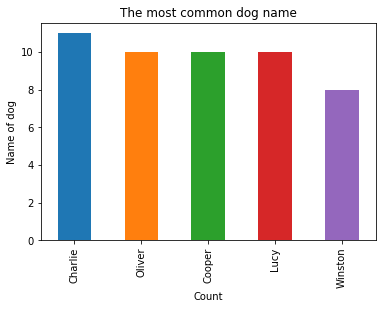

In [147]:
merged_dataframes[merged_dataframes['name']!='None']['name'].value_counts()[0:5].plot(kind = 'bar')
plt.title('The most common dog name')
plt.xlabel('Count')
plt.ylabel('Name of dog');

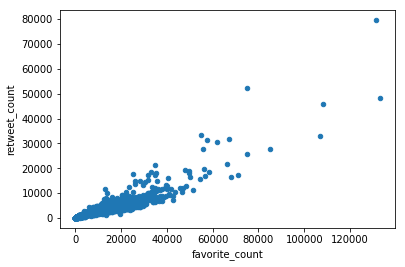

In [148]:
merged_dataframes.plot.scatter('favorite_count','retweet_count');

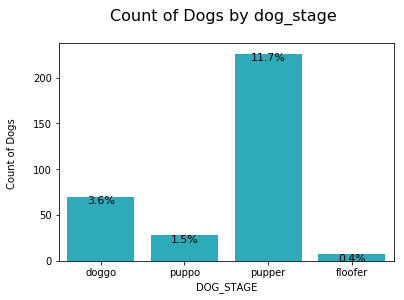

In [56]:
count_plot_one_vb(merged_dataframes,'dog_stage', 'Count of Dogs',9)